# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용 (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정
    - x,y 의 인수는 리스트 형태의 객체들을 대입
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 동일
    - 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

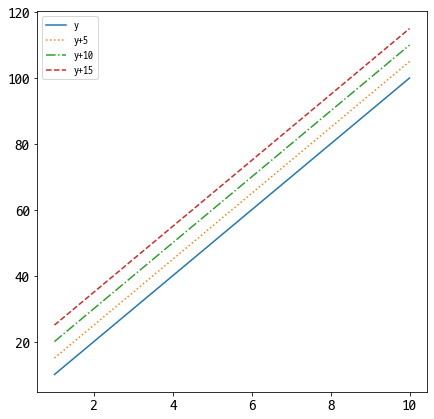

In [2]:
# 값 지정
x = range(1,11)
y = pd.Series(range(10, 110, 10))
y2 = y + 5
y3 = y + 10
y4 = y + 15
# 표 크기 지정
plt.figure(figsize=(7,7))
# x축 값, y값 지정
plt.plot(x, y, label='y')
plt.plot(x, y2, label='y+5', linestyle=':') # linestyle= : 선 종류
plt.plot(x, y3, label='y+10', linestyle='-.')
plt.plot(x, y4, label='y+15', linestyle='--')
#범례
plt.legend()
# 표 반환
plt.show()

### 객체지향 방식

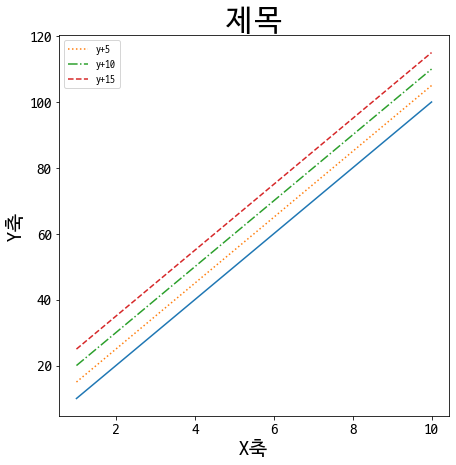

In [3]:
# 1. Axes
fig = plt.figure(figsize=(7,7))
# 2. figure에 axes추가
# ax = fig.add_subplot(1,1,1)
ax = plt.gca() # 하나의 figure에 한개의 axes를 사용할 시 Get Current Axes
ax.plot(x, y)
ax.plot(x, y2, label='y+5', linestyle=':')
ax.plot(x, y3, label='y+10', linestyle='-.')
ax.plot(x, y4, label='y+15', linestyle='--')
# 3. 제목설정
ax.set_title('제목')
# 4. 축 이름 설정
ax.set_xlabel('X축')
ax.set_ylabel('Y축')
# 범례 설정
ax.legend()
# 그래프 보이기
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [4]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.rename(columns={'최대농도(㎍/㎥/시)':'최대농도'}, inplace=True)
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


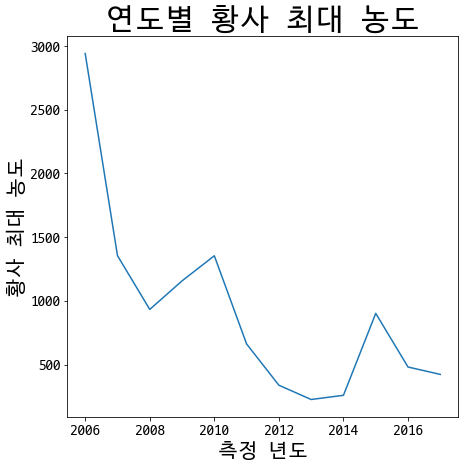

In [5]:
# 표크기 설정
plt.figure(figsize=(7,7))
# 각 축 값 설정
plt.plot(df['년도'], df['최대농도'])
# axes 제목 설정
plt.title('연도별 황사 최대 농도')
# 각 축 라벨명 지정
plt.xlabel('측정 년도')
plt.ylabel('황사 최대 농도')
# 표출력
plt.show()

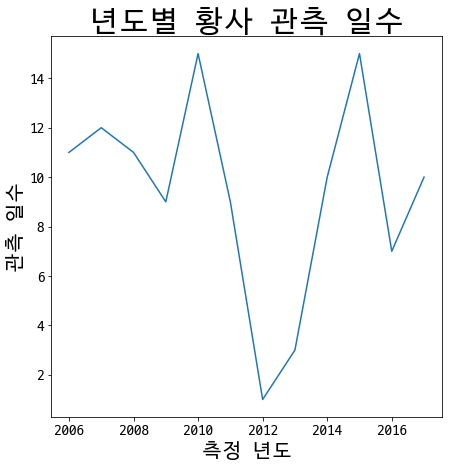

In [6]:
# 년도별 관측일수의 변화량
plt.figure(figsize=(7,7))
plt.plot(df['년도'],df['관측일수'])
plt.title('년도별 황사 관측 일수')
plt.xlabel('측정 년도')
plt.ylabel('관측 일수')
plt.show()

## 다수의 axes 그래프 생성
### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

### 한 figure 내 다른 axes(subplot)를 각각 생성

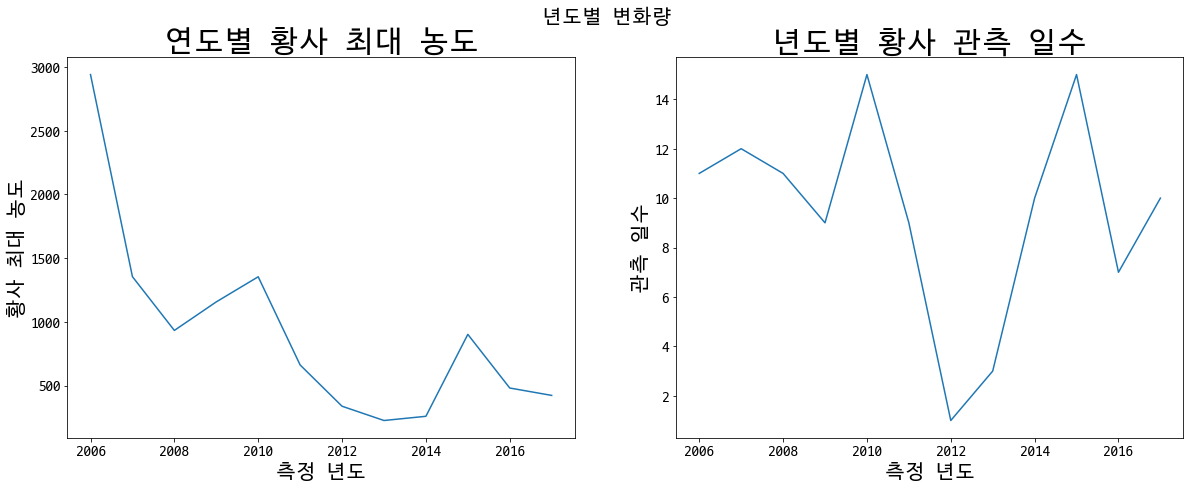

In [7]:
fig = plt.figure(figsize=(20, 7))
fig.suptitle('년도별 변화량', fontsize=20) # figure의 tiltle

# axes 생성
plt.subplot(121)
plt.plot(df['년도'], df['최대농도'])
plt.title('연도별 황사 최대 농도')
plt.xlabel('측정 년도')
plt.ylabel('황사 최대 농도')

# 다른 axes 생성
plt.subplot(122)
plt.plot(df['년도'], df['관측일수'])
plt.title('년도별 황사 관측 일수')
plt.xlabel('측정 년도')
plt.ylabel('관측 일수')
plt.show()

plt.show()

### 하나의 axes에 두개의 범례로 생성
- 두 컬럼(변수)의 값의 범위(scale)가 같거나 비슷한 경우 생성 권장

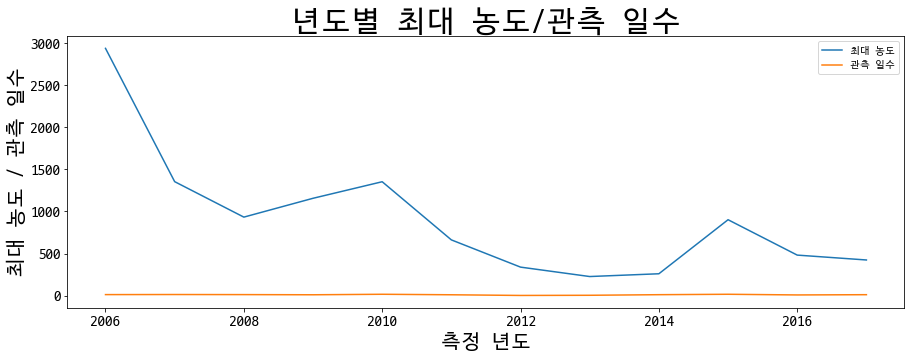

In [8]:
plt.figure(figsize=(15, 5))

plt.plot(df['년도'], df['최대농도'], label='최대 농도')
plt.plot(df['년도'], df['관측일수'], label='관측 일수')

plt.title('년도별 최대 농도/관측 일수')
plt.xlabel('측정 년도')
plt.ylabel('최대 농도 / 관측 일수')

plt.legend()
plt.show()

### twinx()

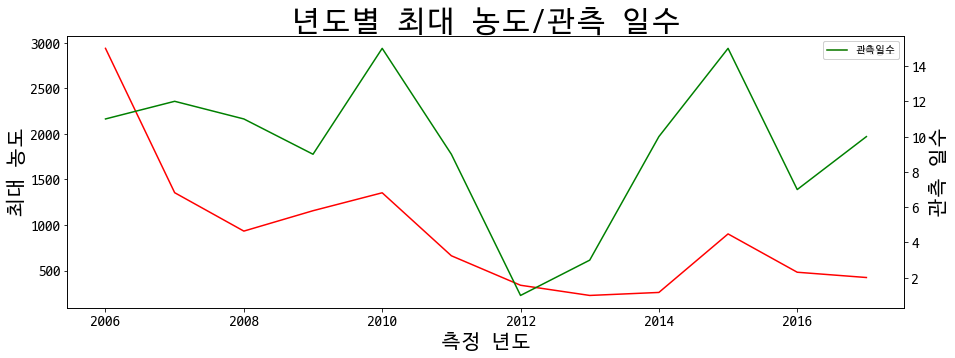

In [9]:
# 크기 지정
fig = plt.figure(figsize=(15, 5))
# x축 설정
ax1 = fig.add_subplot(1, 1, 1) # 또는 plt.gca() : AxesSubplot
ax2 = ax1.twinx()
# y축 설정
ax1.plot(df['년도'], df['최대농도'], label='최대농도', c='r')
ax2.plot(df['년도'], df['관측일수'], label='관측일수', c='g')
# 축 별 이름 설정
ax1.set_xlabel('측정 년도')
ax1.set_ylabel('최대 농도')
ax2.set_ylabel('관측 일수')
# 표이름 설정
ax1.set_title('년도별 최대 농도/관측 일수')
# 범례 설정
ax1.legend()
ax2.legend() # 'ax1.legend()'에 덮어쓰기
# 표출력
plt.show()

## legend box 위치 설정
 - Axes 내 정해진 위치에 설정
    - axes.legend(loc='상하위치 좌우위치')
    - 상하 : lower, center, upper
    - 좌우 : left, center, right
    - 기본 : best
 - 원하는 위치 지정
     - bbox_to_anchor, loc 두개의 매개변수 사용
     - bbox_to_anchor : legend box의 Axes상의 위치
         - 상하, 좌우
         - 전체 Axes(subplot)기준
             - 상단 : (0, 1), (1, 1)
             - 하단 : (0, 0), (1, 0)
     - loc : legend box의 기준 위치
     - legend box의 loc를 bbox_to_anchord에 위치

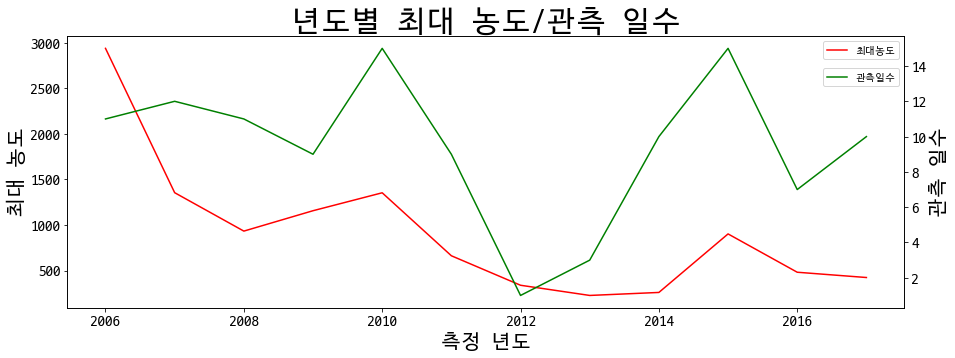

In [10]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(df['년도'], df['최대농도'], label='최대농도', c='r')
ax2.plot(df['년도'], df['관측일수'], label='관측일수', c='g')
ax1.set_xlabel('측정 년도')
ax1.set_ylabel('최대 농도')
ax2.set_ylabel('관측 일수')
ax1.set_title('년도별 최대 농도/관측 일수')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper right') # Axes의 (1,1) 포인트의 (위 오른쪽)에 위치
ax2.legend(bbox_to_anchor=(1, 0.9), loc='upper right') 
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인 가능
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 대입
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 동일

In [11]:
import numpy as np

x = np.arange(1,1000, 50) # 1 ~ 1000-1 +50
y = np.arange(1,1000, 50)

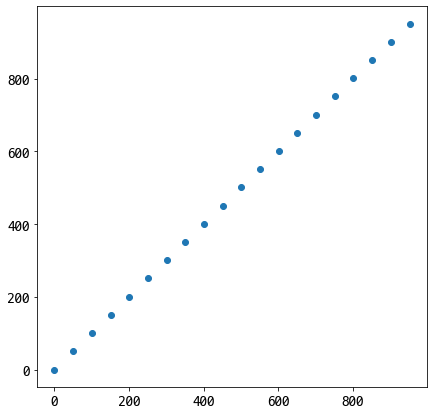

In [12]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y) # x와 같은 인덱스의 값끼리 묶어 점으로 찍음
plt.show()

In [13]:
y2 = np.random.randint(100, 300, 20) # 100 ~ 300-1 사이에서 임의의 정수 20개 추출
y2

array([163, 278, 235, 191, 168, 247, 138, 281, 259, 180, 180, 202, 262,
       194, 280, 270, 165, 159, 153, 214])

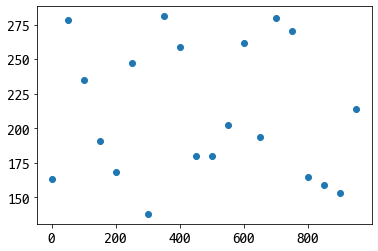

In [14]:
plt.scatter(x, y2)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경 가능
    - scatter() 메소드의 marker 매개변수를 이용해 변경
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 마커의 크기
    - 리스트형태(리스트, 튜플)로 지정
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

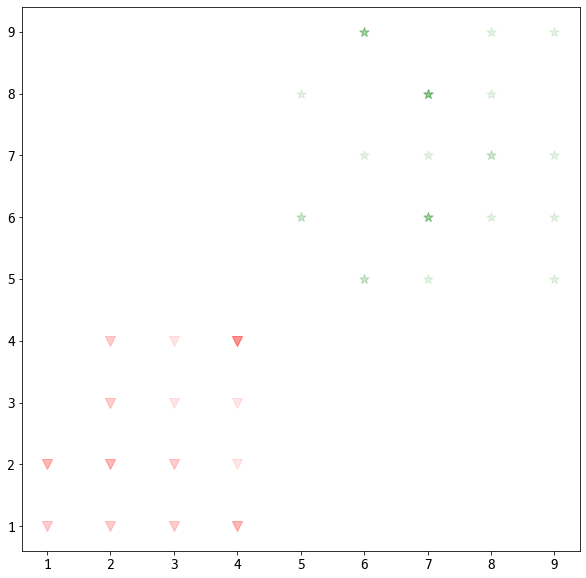

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(x=np.random.randint(1,5,30), y=np.random.randint(1,5,30),
            marker='v', # marker 스타일
            color='red',
            s=100, # marker 사이즈
            alpha=0.1 # 투명도(0 ~ 1)
           )
plt.scatter(x=np.random.randint(5,10,30), y=np.random.randint(5,10,30), marker='*', c='g', s=100, alpha=0.1)
plt.show()

## 2.3 산점도 활용

### 상관관계

#### 경보 발령횟수와 관측일수의 상관관계
      - 경보 발령횟수가 만았던 년도는 관축일수도 많았나?

In [16]:
df[['경보 발령횟수', '관측일수']]

,경보 발령횟수,관측일수
0,1,11
1,1,12
2,1,11
3,2,9
4,2,15
5,0,9
6,0,1
7,0,3
8,0,10
9,1,15


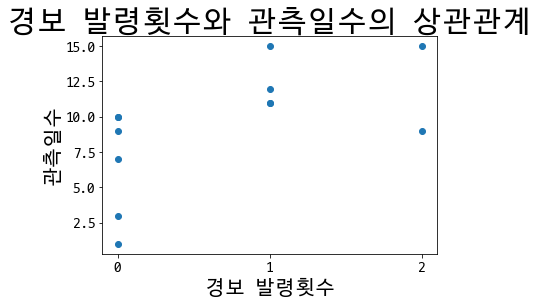

In [17]:
plt.scatter(df['경보 발령횟수'], df['관측일수'])
plt.title('경보 발령횟수와 관측일수의 상관관계')
plt.xlabel('경보 발령횟수')
plt.ylabel('관측일수')

# 눈금(tick) 재조정
# x축 : xticks
plt.xticks([0, 1, 2]) # (눈금의 위치, 눈금의 label), label 생략 시 눈금의 value값이 label
plt.show()

### 두 컬럼(변수) 간 상관관계를 게산
- 정성적 판단 : 산점도(scatter plot)
- 정량적 판단 :  상관계수
- 상관관계 : 양의 상관관계(비례), 음의 상관관계(반비례)
- 상관계수 : -1 ~ +1의 실수
- 음의 상관관계 : 상관계수가 음수, 양의 상관관계 : 상관관계가 양수, 관계 없음 : 상관계수가 0
    - ±1에 가까울수록 관계성이 큼
    - 0에 가까울 수록 관계성이 작음
    - 1 ≥ 상관계수 ≥ 0.7 : 아주 강한 상관관계
    - 0.7 > 상관계수 ≥ 0.3 : 강한 상관관계
    - 0.3 > 상관계수 ≥ 0.1 : 약한 상관관계
    - 0.1 > 상관계수 ≥ 0 : 관계성 없음

In [18]:
df[['경보 발령횟수', '관측일수']].corr()

,경보 발령횟수,관측일수
경보 발령횟수,1.000000,0.604161
관측일수,0.604161,1.000000


In [19]:
np.corrcoef(df['경보 발령횟수'], df['관측일수']) # 0.6 : 강한 상관관계

array([[1.        , 0.60416124],
       [0.60416124, 1.        ]])

#### diamonds.csv의 상관관계

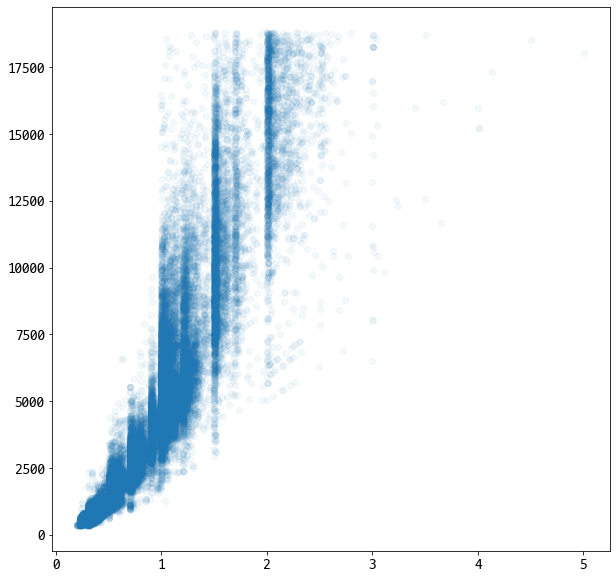

In [20]:
# carat과 price간의 관계
dia = pd.read_csv('data/diamonds.csv')

plt.figure(figsize=(10,10))
plt.scatter(dia['carat'], dia['price'], alpha=0.05)
plt.show()

In [21]:
dia[['carat','price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비
- 매개변수
    - 대상
    - 대상의 수량

In [22]:
fruits = ['사과', '참외', '딸기']
counts = [200, 100, 300] # 사과 참외 딸기의 개수

<function matplotlib.pyplot.show(close=None, block=None)>

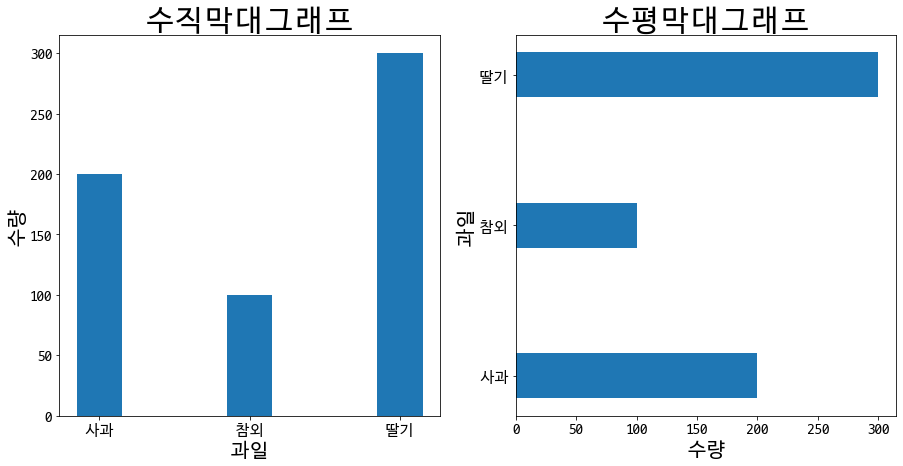

In [23]:
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.bar(fruits, counts, width=0.3) # 대상, 수량 # width= : 두께설정
plt.title('수직막대그래프')
plt.xlabel('과일')
plt.ylabel('수량')

plt.subplot(1, 2, 2)
plt.barh(fruits, counts, height=0.3) # height= : 폭 설정 
plt.title('수평막대그래프')
plt.xlabel('수량')
plt.ylabel('과일')

plt.show

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)
- 2018년 계절별 강수량

In [24]:
rd = pd.read_excel('data/강수량.xlsx')
rd.set_index('계절', inplace=True)
rd

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
계절,,,,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6,368.1,173.9,172.8
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7,586.5,493.0,1012.4
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5,351.2,448.4,259.4
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6,66.5,168.1,46.7


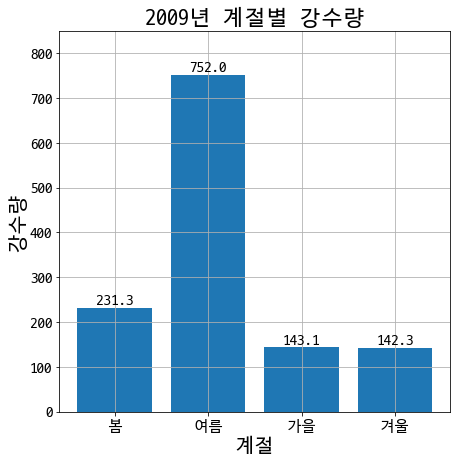

In [25]:
# 2009년 계절 별 강수량 비교
plt.figure(figsize=(7,7))
plt.bar(rd.index, rd[2009])

# 막대 위 수량값을 text로 출력
for x, y in enumerate(rd[2009]):
    plt.text(x-0.2, y+7, y, fontsize=15) # plt.text(x 좌표, y 좌표, '입력문자' )

plt.title('2009년 계절별 강수량', fontsize=22)
plt.xlabel('계절')
plt.ylabel('강수량')
plt.ylim(0, 850) # ylim : y축 값의 범위 지정
plt.grid(True)
plt.show()

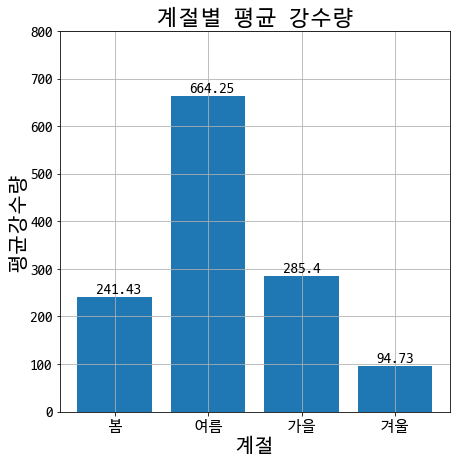

In [26]:
# 계절별 평균 강수량 비교
mean_rd = round(rd.mean(axis=1), 2)
plt.figure(figsize=(7,7))
plt.bar(rd.index, mean_rd)
for x, y in enumerate(mean_rd):
    plt.text(x-0.2, y+7, y, fontsize=15)
plt.title('계절별 평균 강수량', fontsize=22)
plt.xlabel('계절')
plt.ylabel('평균강수량')
plt.ylim(0, 800)
plt.grid(True)
plt.show()